# DATA VISUALIZATION — TEXT EXPLORATION & ANALYSIS

### LIBRARY

In [45]:
import pandas as pd                        # FOR DATA HANDLING
import matplotlib.pyplot as plt            # FOR BASIC PLOTTING
import seaborn as sns                      # FOR STYLED VISUALIZATIONS
from wordcloud import WordCloud            # FOR WORDCLOUDS
from collections import Counter            # FOR FREQUENCY ANALYSIS
from nltk.util import ngrams               # FOR N-GRAM EXTRACTION
import plotly.express as px                # FOR INTERACTIVE CHARTS 
import string                              # FOR CHARACTER FILTERING
from matplotlib import font_manager          # FOR MANAGING AND CUSTOMIZING FONT PROPERTIES IN PLOTS

### CLEANED DATA

In [46]:
# LOAD THE CLEANED DATA FROM CSV
df = pd.read_csv("../DATA/DATA[C].csv")

# DISPLAY BASIC INFO
print("DATA SHAPE -->", df.shape)
print("COLUMNS -->", df.columns.tolist())

# PREVIEW THE DATA
df.head()

DATA SHAPE --> (38647, 3)
COLUMNS --> ['text', 'label', 'clean_text']


,text,label,clean_text
0,"21st Century Wire says Ben Stein, reputable pr...",0,century wire say ben stein reputable professor...
1,WASHINGTON (Reuters) - U.S. President Donald T...,1,washington reuters president donald trump remo...
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1,reuters puerto rico governor ricardo rossello ...
3,"On Monday, Donald Trump once again embarrassed...",0,monday donald trump embarrassed country accide...
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1,glasgow scotland reuters presidential candidat...


### LABEL DISTRIBUTION (REAL VS FAKE NEWS COUNT)

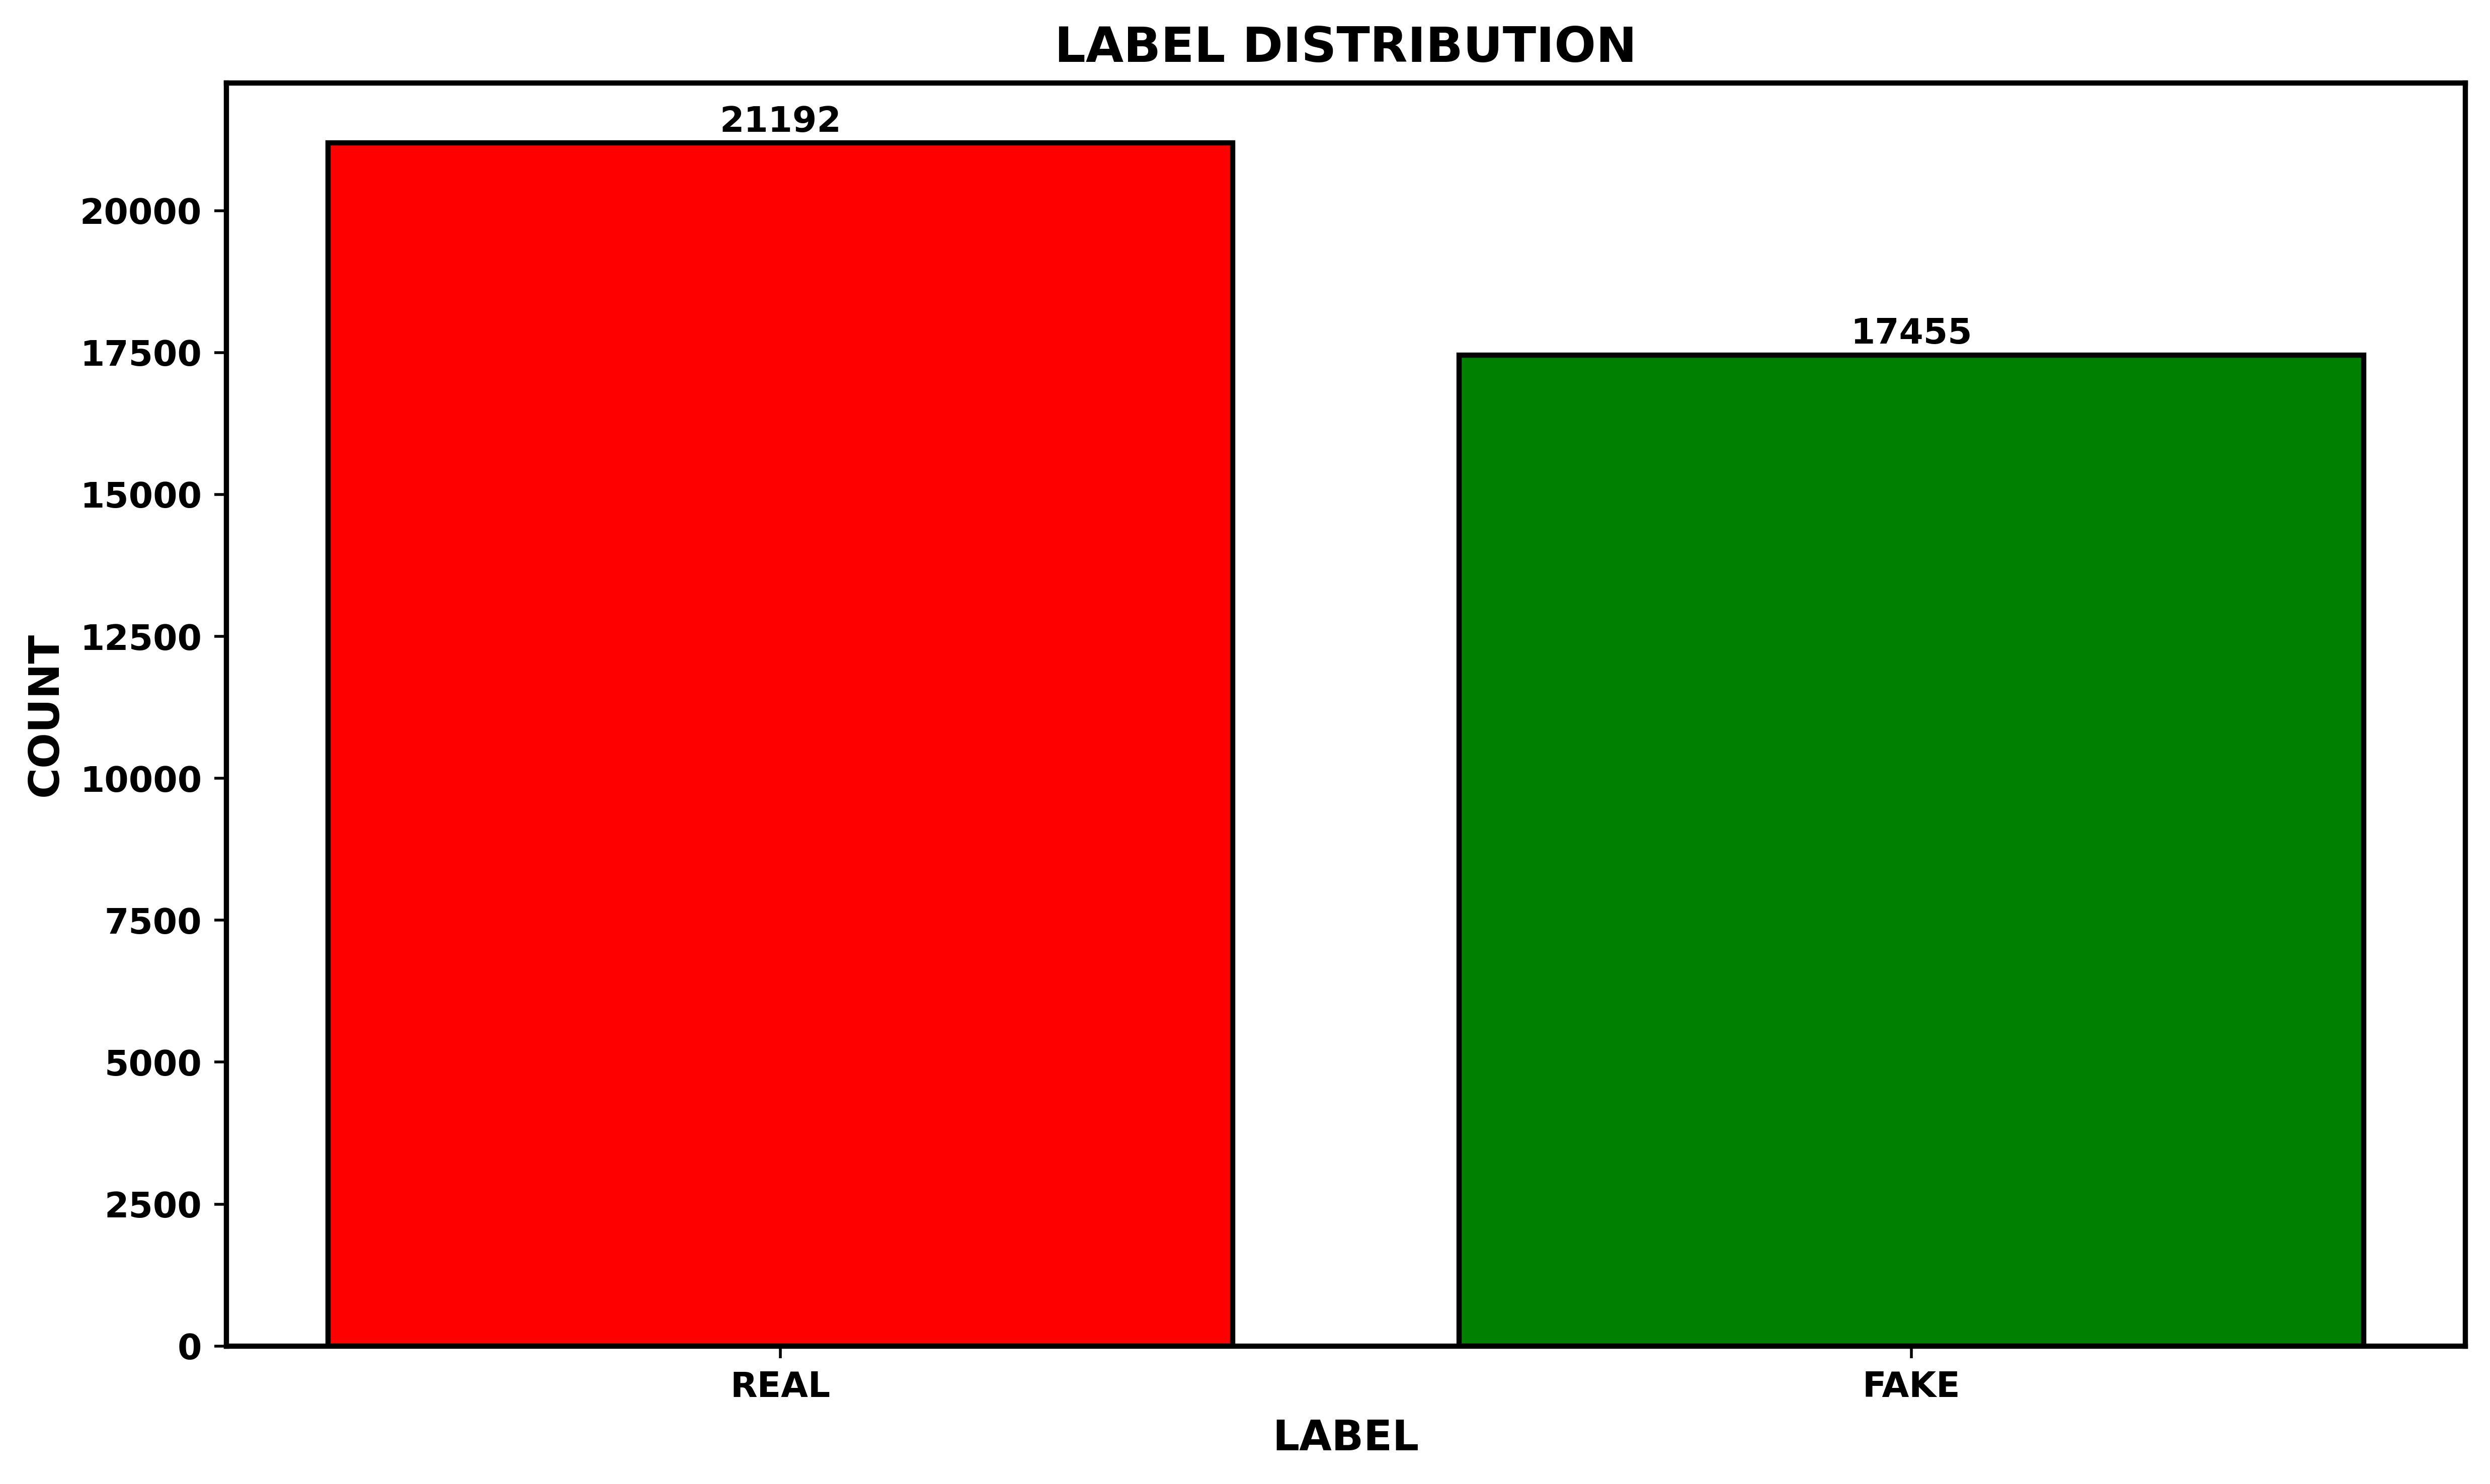

In [55]:
# COUNT LABELS
label_counts = df['label'].value_counts().rename({0: 'FAKE', 1: 'REAL'})

# PLOT
plt.figure(figsize=(10, 6), dpi=500)
bars = plt.bar(label_counts.index, label_counts.values, color=['red', 'green'],
               edgecolor='black', linewidth=1.5)

# BOLD FORMATTING
plt.title("LABEL DISTRIBUTION", fontsize=14, fontweight='bold', color='black')
plt.xlabel("LABEL", fontsize=12, fontweight='bold', color='black')
plt.ylabel("COUNT", fontsize=12, fontweight='bold', color='black')
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

# ANNOTATE
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 200,
             str(int(height)), ha='center', fontsize=10,
             fontweight='bold', color='black')

plt.tight_layout()
plt.show()


### WORDCLOUDS FOR FAKE AND REAL NEWS

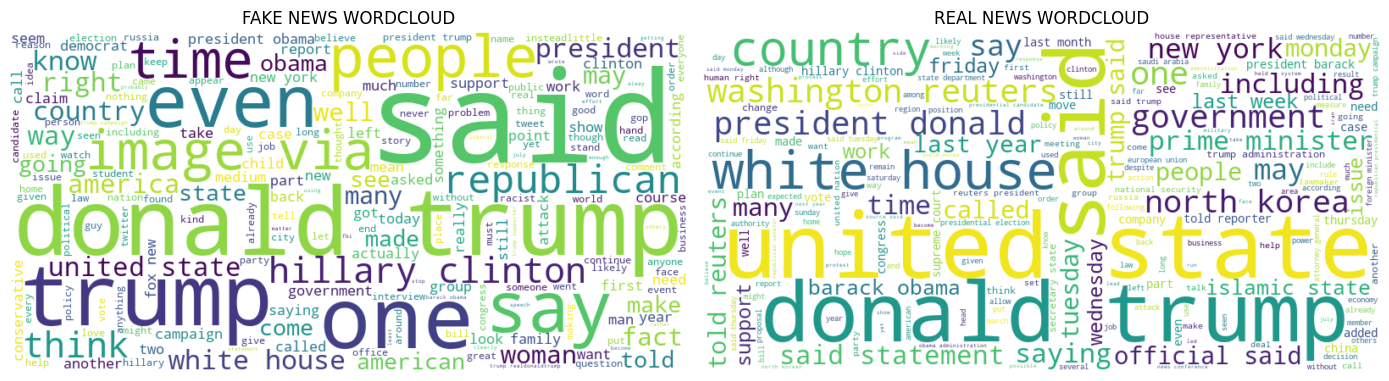

In [50]:
# SPLIT DATA

# PREPARE TEXT FOR FAKE NEWS: DROP NaNs AND CONVERT TO STRING
fake_text = " ".join(df[df['label'] == 0]['clean_text'].dropna().astype(str))

# PREPARE TEXT FOR REAL NEWS: DROP NaNs AND CONVERT TO STRING
real_text = " ".join(df[df['label'] == 1]['clean_text'].dropna().astype(str))

# GENERATE WORD CLOUD FOR FAKE NEWS
wc_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)

# GENERATE WORD CLOUD FOR REAL NEWS
wc_real = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# PLOT BOTH WORD CLOUDS SIDE BY SIDE
plt.figure(figsize=(14, 6))  # SET OVERALL FIGURE SIZE

plt.subplot(1, 2, 1)  # FIRST SUBPLOT FOR FAKE NEWS
plt.imshow(wc_fake, interpolation='bilinear')  # DISPLAY WORD CLOUD
plt.axis("off")  # HIDE AXES
plt.title("FAKE NEWS WORDCLOUD")  # SET TITLE

plt.subplot(1, 2, 2)  # SECOND SUBPLOT FOR REAL NEWS
plt.imshow(wc_real, interpolation='bilinear')  # DISPLAY WORD CLOUD
plt.axis("off")  # HIDE AXES
plt.title("REAL NEWS WORDCLOUD")  # SET TITLE

plt.tight_layout()  # OPTIMIZE LAYOUT
plt.show()  # SHOW THE PLOT


### TEXT LENGTH DISTRIBUTION ANALYSIS

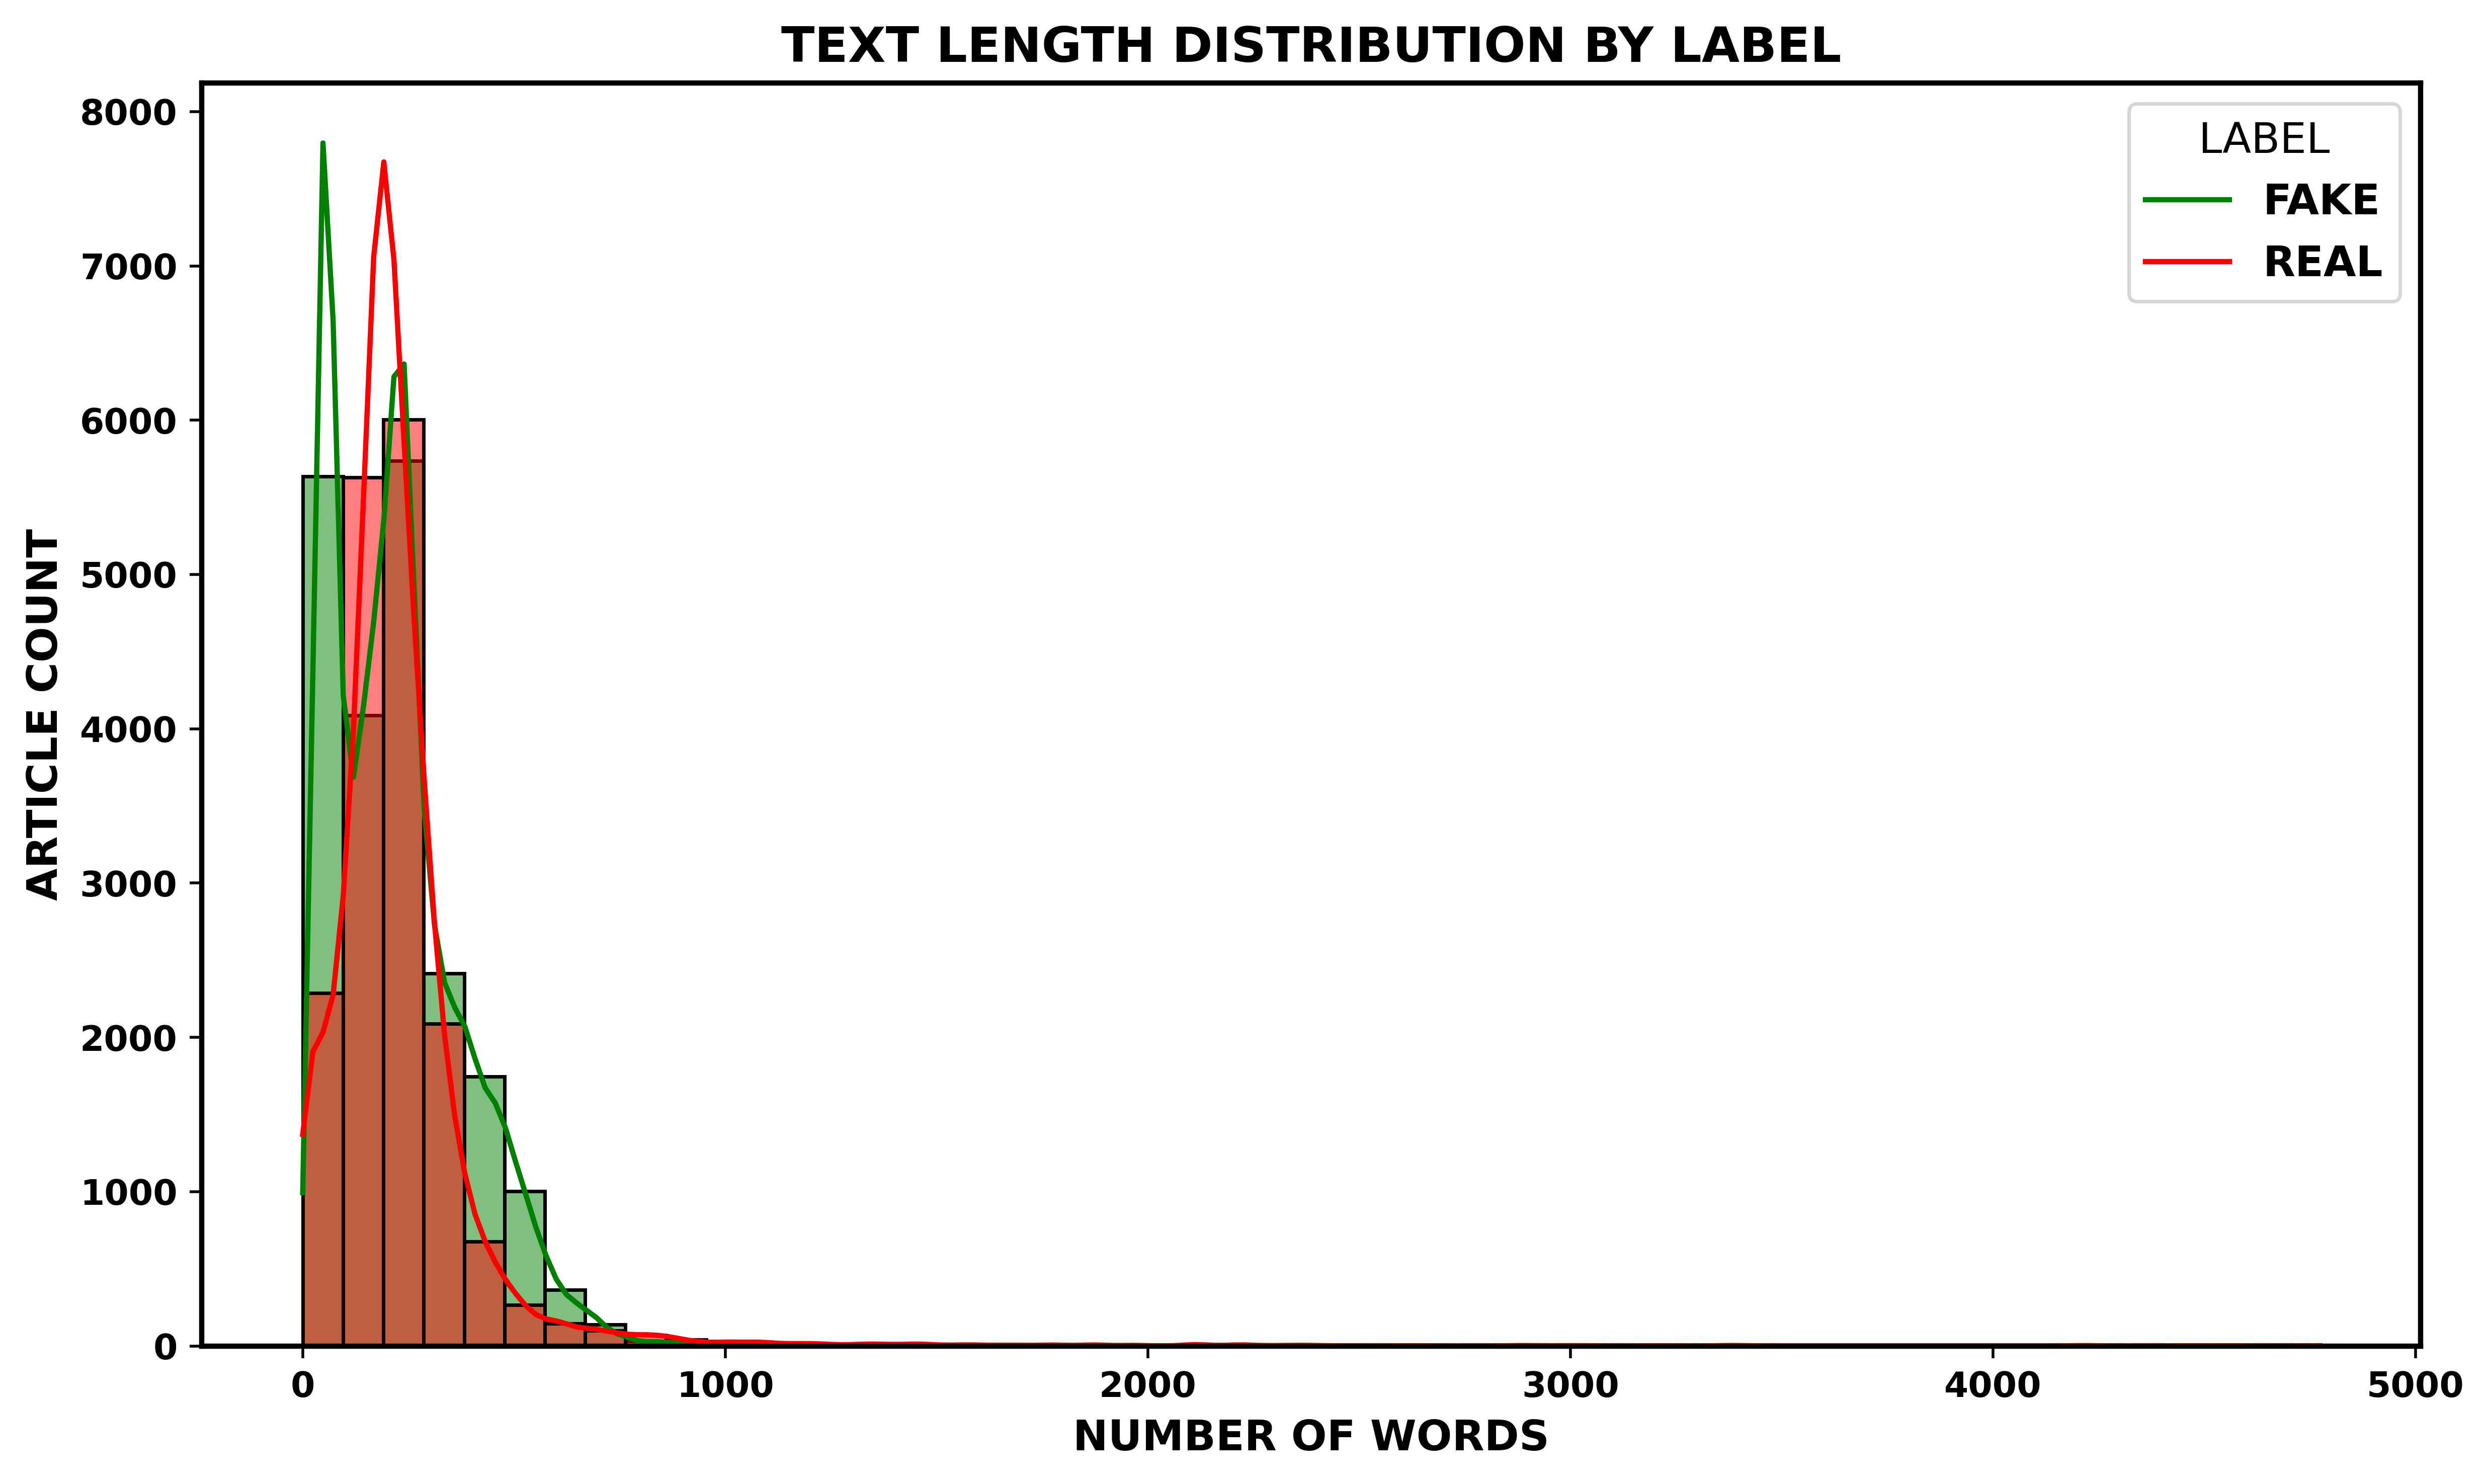

In [56]:
# CREATE A FONT DICTIONARY FOR THE LEGEND
legend_font = font_manager.FontProperties(weight='bold', size=12)

# PLOT THE HISTOGRAM
plt.figure(figsize=(10, 6), dpi=500)
sns.histplot(data=df, x='text_length', hue='label', bins=50, kde=True,
             palette={0: 'red', 1: 'green'}, edgecolor='black')

# SET PLOT TITLE AND AXIS LABELS WITH FONT SETTINGS
plt.title("TEXT LENGTH DISTRIBUTION BY LABEL", fontsize=14, fontweight='bold', color='black')
plt.xlabel("NUMBER OF WORDS", fontsize=12, fontweight='bold', color='black')
plt.ylabel("ARTICLE COUNT", fontsize=12, fontweight='bold', color='black')

# APPLY FONT PROPERTIES TO THE LEGEND
plt.legend(title="LABEL", labels=["FAKE", "REAL"], prop=legend_font, title_fontsize=12, loc='best')

# SET FONT PROPERTIES FOR AXIS TICKS
plt.xticks(fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# ADJUST SPINE WIDTH AND COLOR
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.5)
    spine.set_color('black')

# TIGHTEN LAYOUT AND DISPLAY THE PLOT
plt.tight_layout()
plt.show()

### MOST FREQUENT WORDS (UNIGRAM ANALYSIS)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32752\2950647193.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




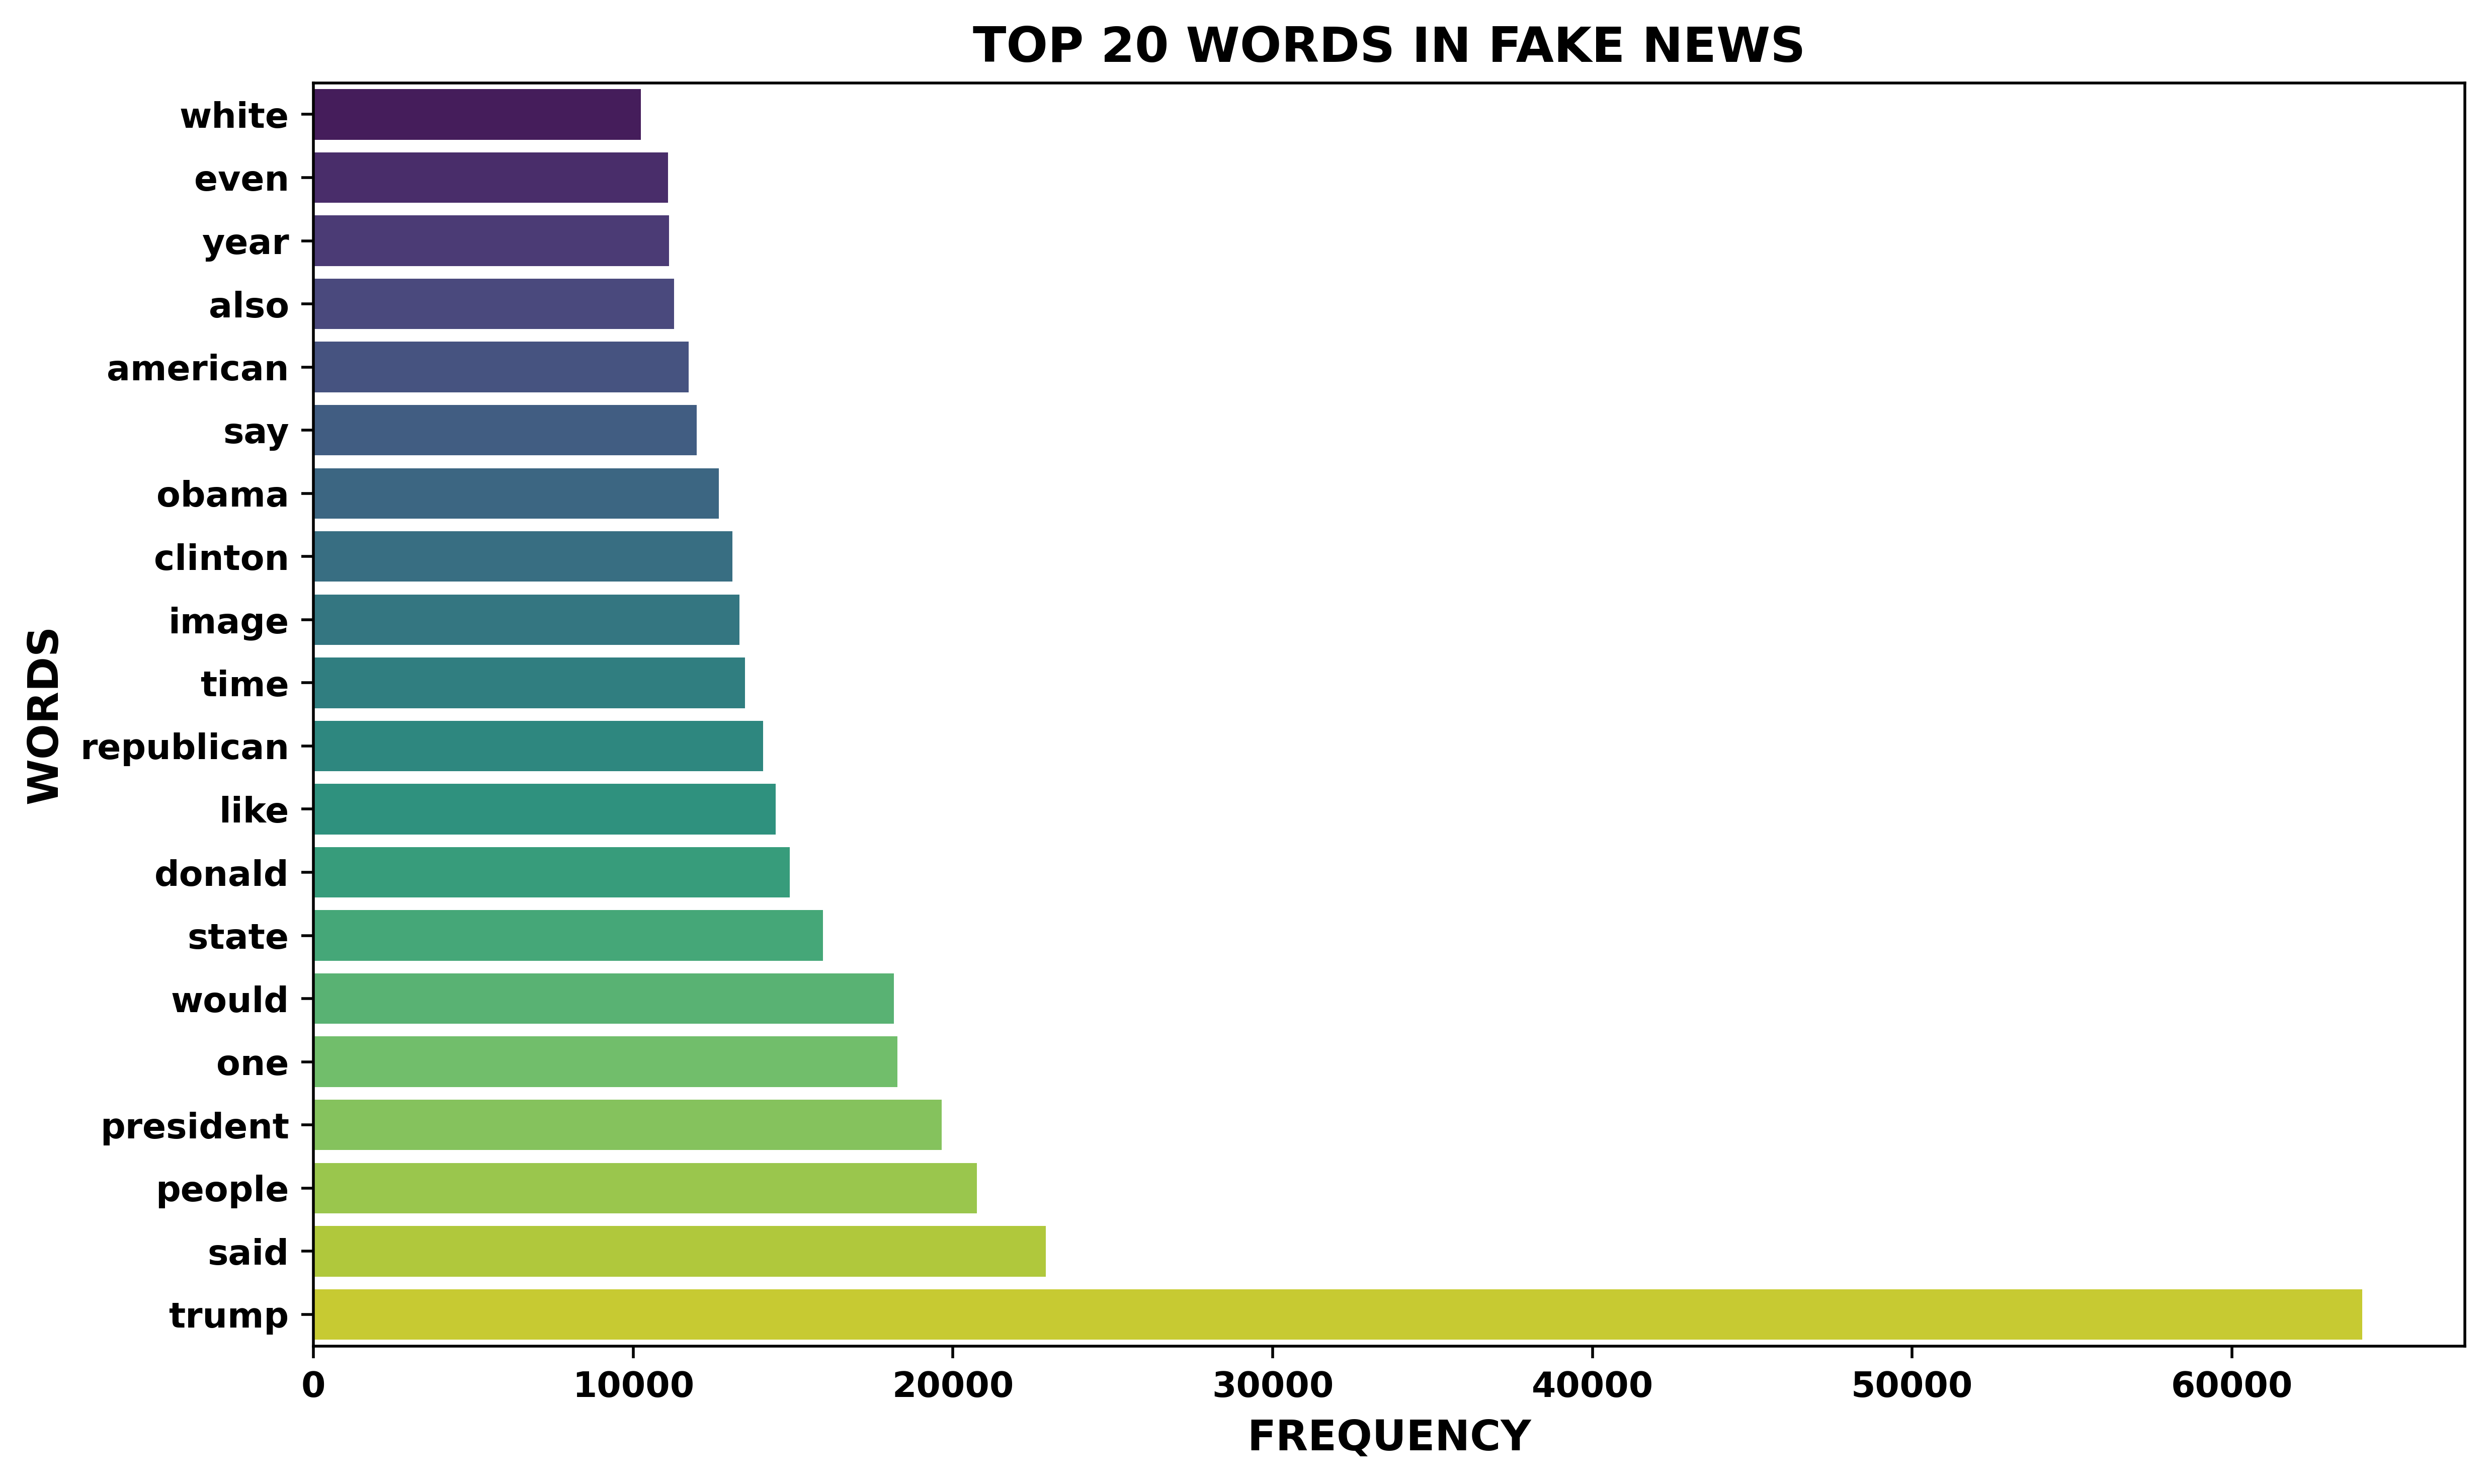

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32752\2950647193.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




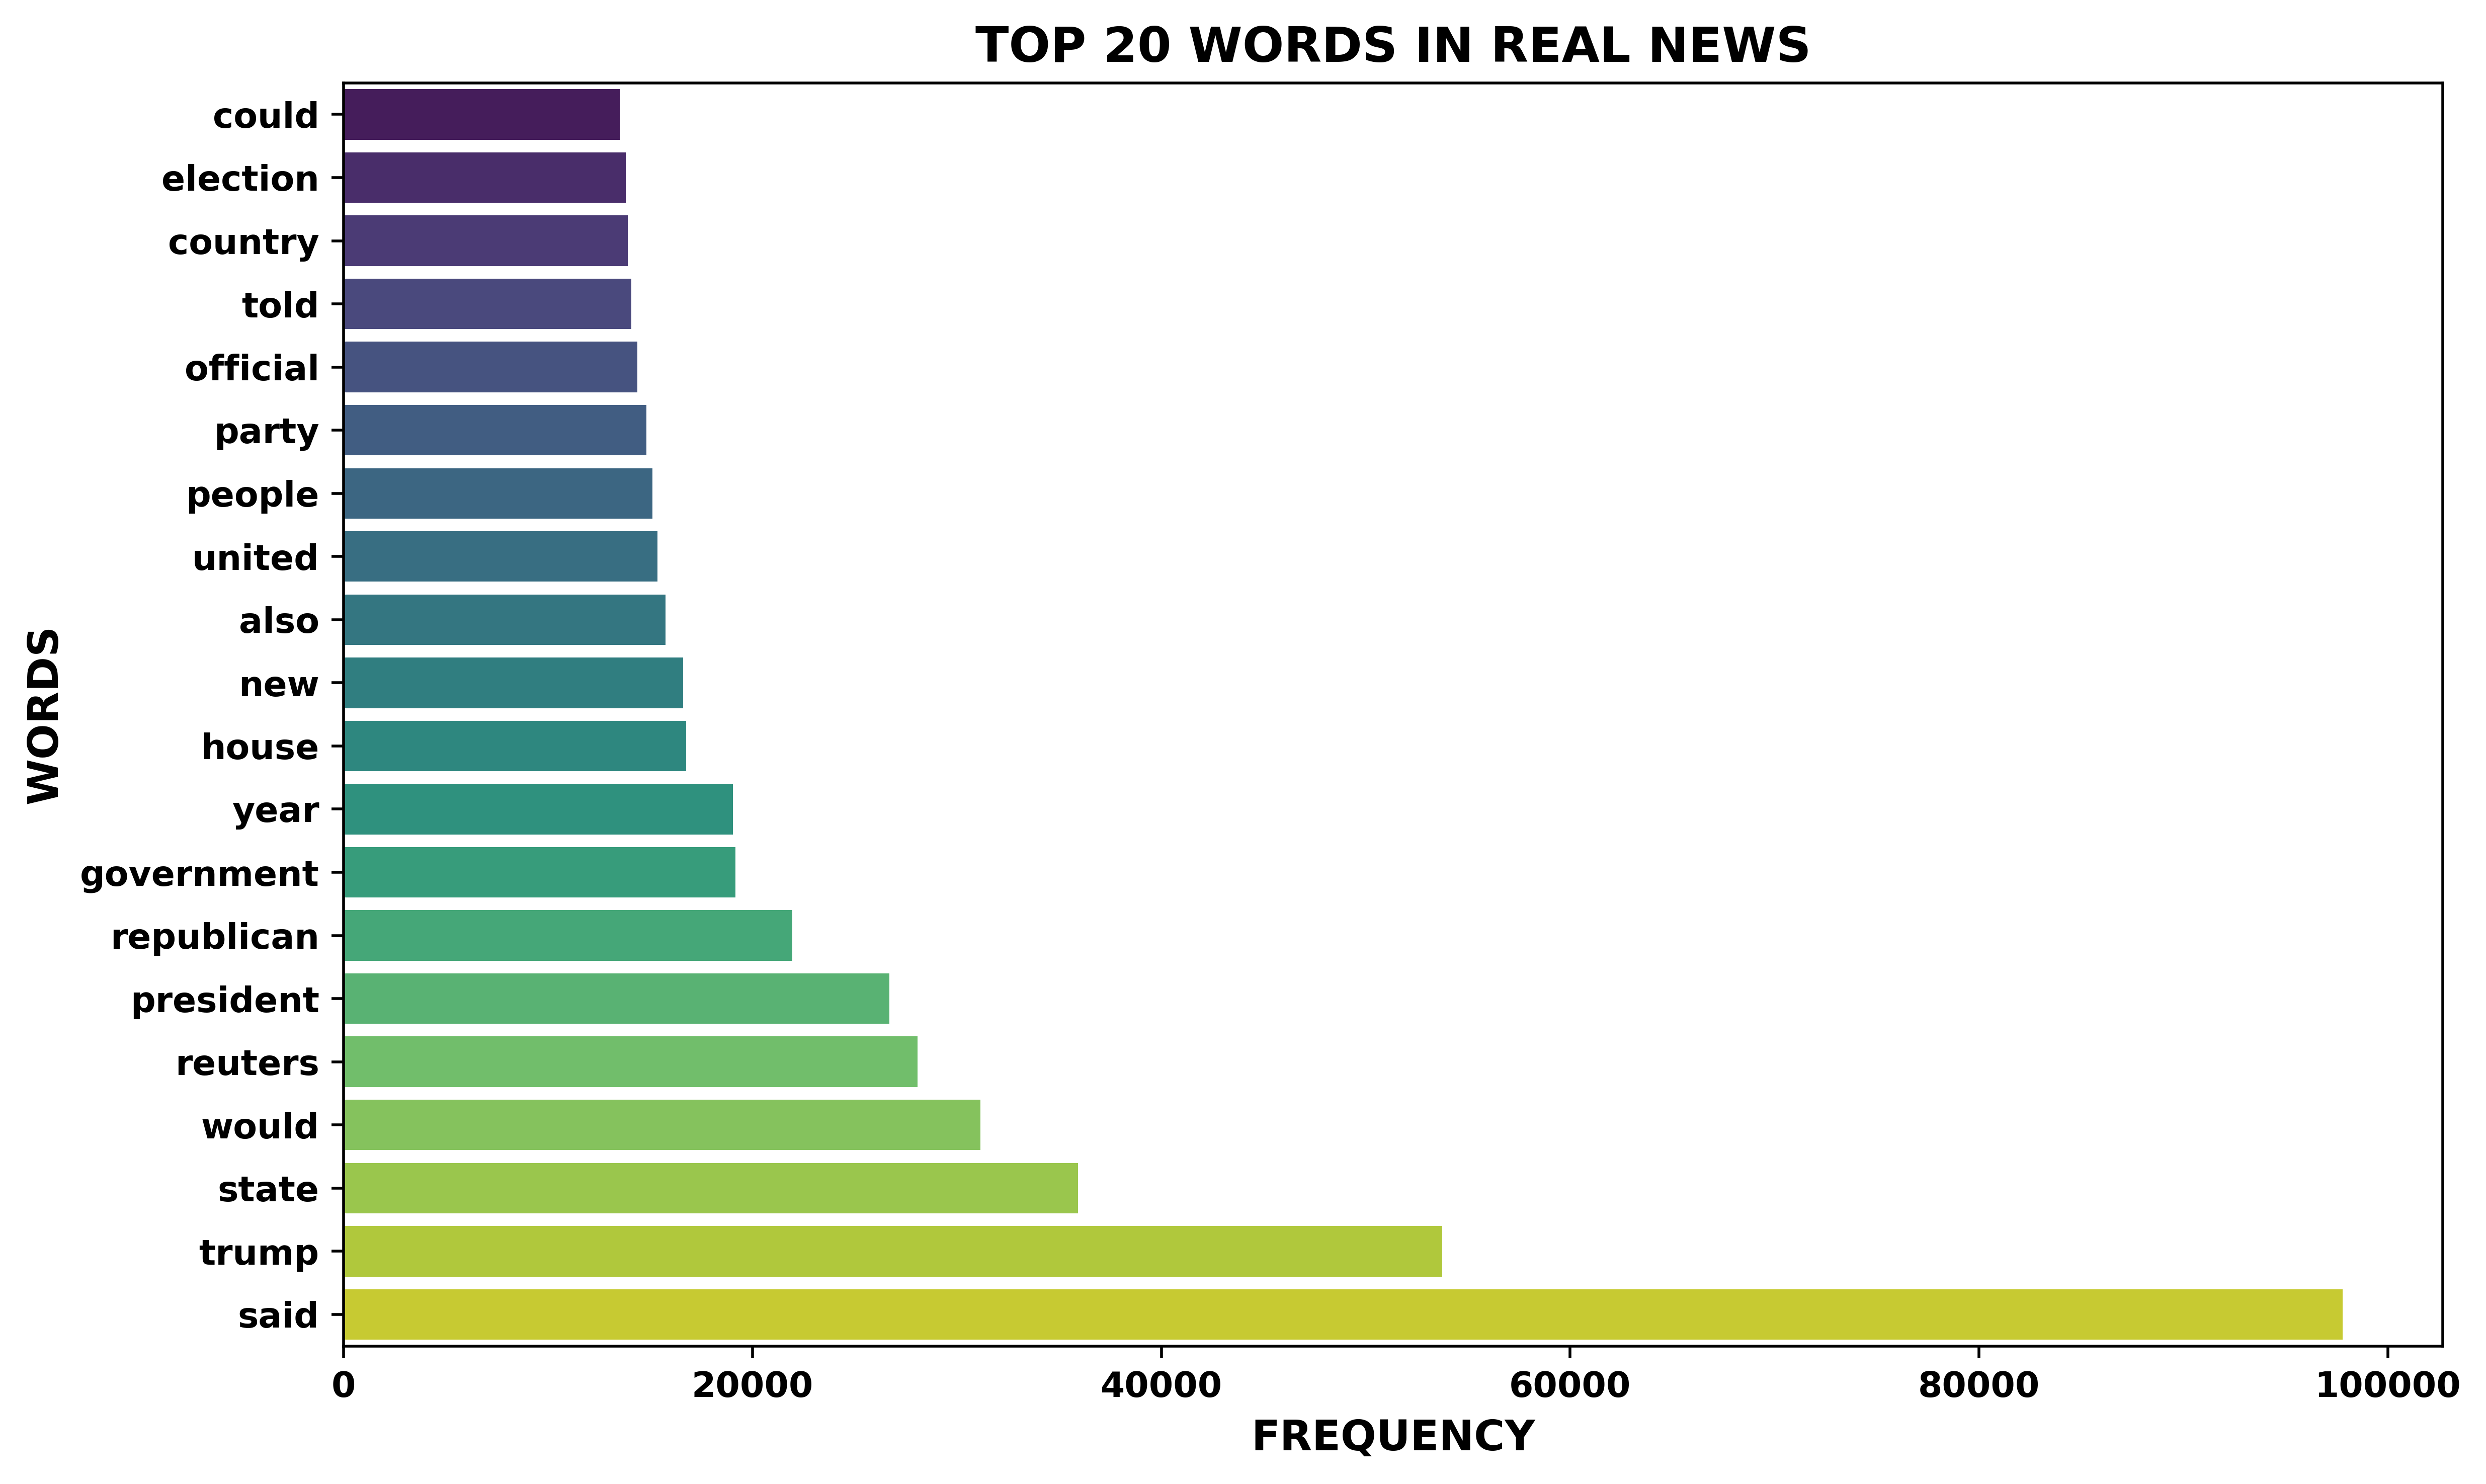

In [57]:
# FUNCTION TO PLOT TOP WORDS
def plot_top_words(text_series, title, n=20):
    # ENSURE ALL TEXT IS STRING AND HANDLE NaN VALUES
    all_words = " ".join(text_series.dropna().astype(str)).split()
    
    # GET MOST COMMON WORDS
    most_common = Counter(all_words).most_common(n)
    
    # EXTRACT WORDS AND THEIR COUNTS
    words, counts = zip(*most_common)

    # CREATE FIGURE WITH SPECIFIED SIZE AND DPI
    plt.figure(figsize=(10, 6), dpi=500)
    
    # CREATE BARPLOT USING SEABORN
    sns.barplot(x=counts[::-1], y=words[::-1], palette='viridis')
    
    # ADD TITLE AND LABELS
    plt.title(title, fontsize=14, fontweight='bold', color='black')
    plt.xlabel("FREQUENCY", fontsize=12, fontweight='bold', color='black')
    plt.ylabel("WORDS", fontsize=12, fontweight='bold', color='black')
    
    # ADJUST FONT SIZE AND STYLE FOR TICKS
    plt.xticks(fontsize=10, fontweight='bold', color='black')
    plt.yticks(fontsize=10, fontweight='bold', color='black')
    
    # OPTIMIZE LAYOUT
    plt.tight_layout()
    
    # SHOW THE PLOT
    plt.show()

# TOP WORDS IN FAKE NEWS
plot_top_words(df[df['label'] == 0]['clean_text'], "TOP 20 WORDS IN FAKE NEWS")

# TOP WORDS IN REAL NEWS
plot_top_words(df[df['label'] == 1]['clean_text'], "TOP 20 WORDS IN REAL NEWS")

### BIGRAM (2-WORD PHRASE) ANALYSIS

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32752\4208093488.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




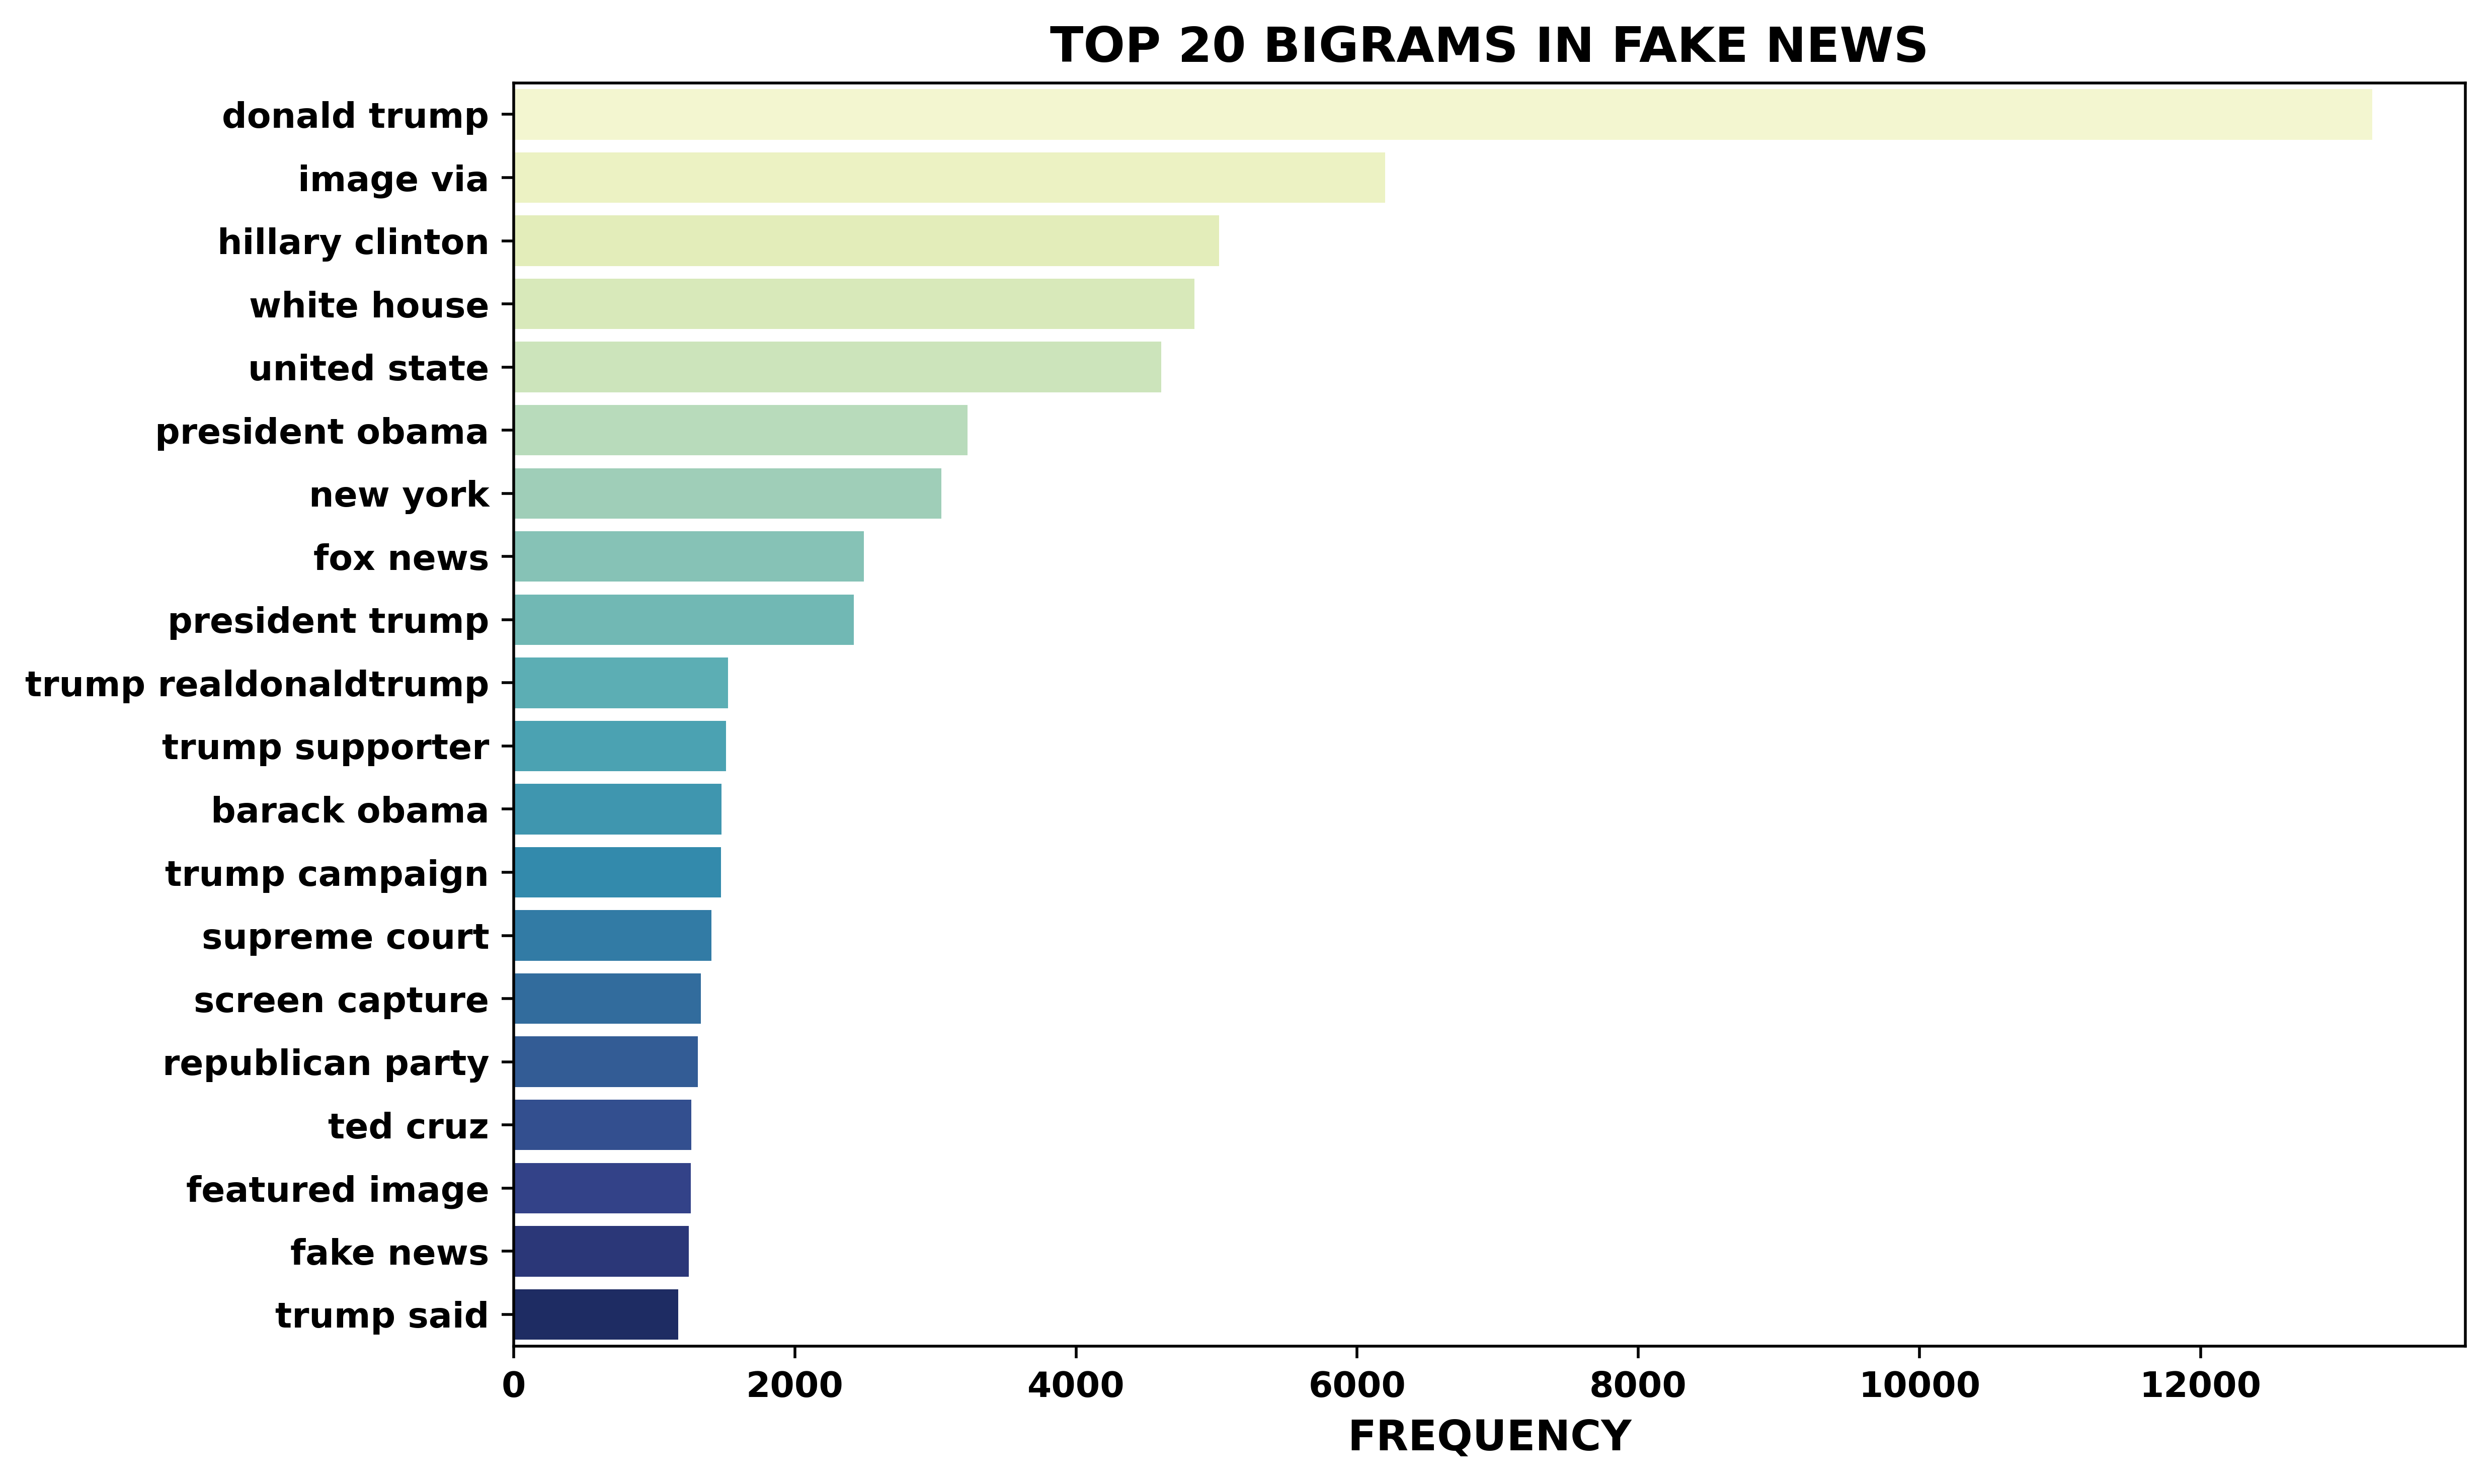

C:\Users\KIIT\AppData\Local\Temp\ipykernel_32752\4208093488.py:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




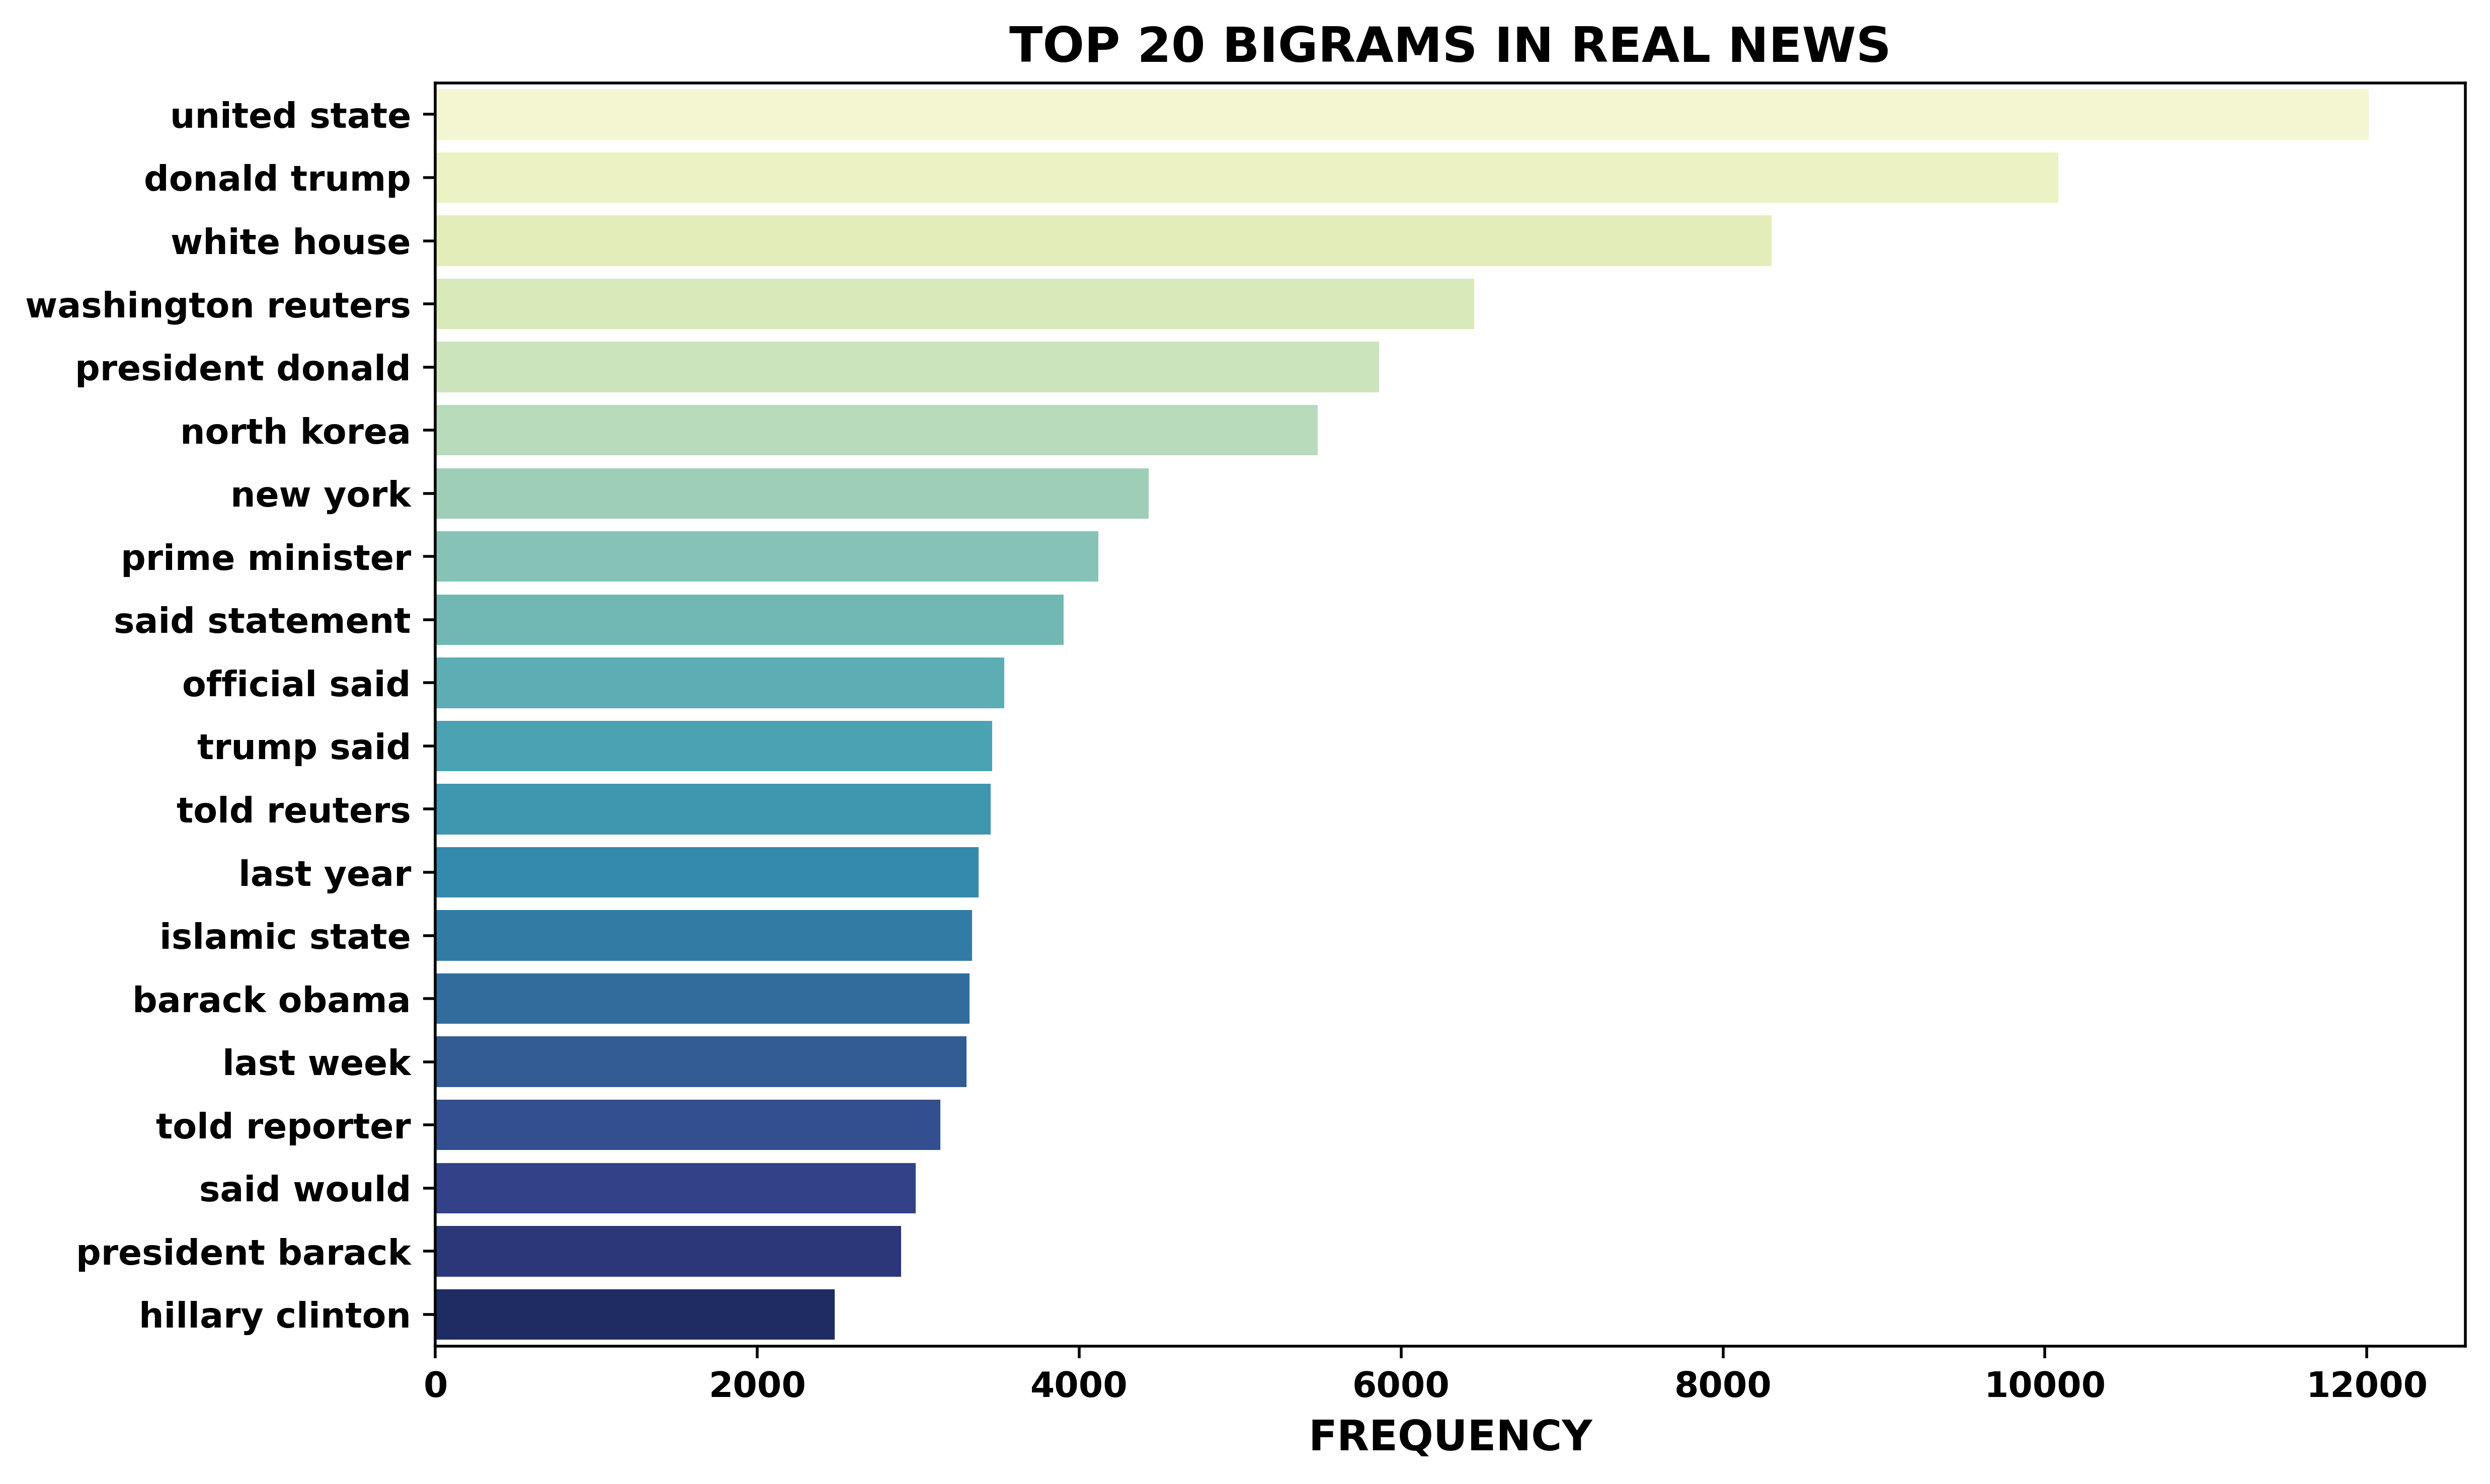

In [58]:
# FUNCTION TO GET TOP NGRAMS
def get_top_ngrams(text_series, n=2, top=20):
    # ENSURE ALL TEXT IS STRING AND HANDLE NaN VALUES
    all_words = " ".join(text_series.dropna().astype(str)).split()
    
    # GENERATE NGRAMS
    n_grams = list(ngrams(all_words, n))
    
    # GET MOST COMMON NGRAMS
    common = Counter(n_grams).most_common(top)
    
    # RETURN NGRAMS AND THEIR COUNTS
    return [" ".join(gram) for gram, count in common], [count for gram, count in common]

# FUNCTION TO PLOT TOP NGRAMS
def plot_top_ngrams(phrases, counts, title):
    plt.figure(figsize=(10, 6), dpi=500)
    
    # PLOT THE BIGRAMS USING A DYNAMIC COLOR PALETTE
    sns.barplot(x=counts, y=phrases, palette=sns.color_palette("YlGnBu", len(counts)))
    
    # ADD TITLE AND LABELS WITH BOLD FONT
    plt.title(title, fontsize=14, fontweight='bold', color='black')  
    plt.xlabel("FREQUENCY", fontsize=12, fontweight='bold', color='black')
    
    # ADJUST FONT SIZE AND STYLE FOR TICKS
    plt.xticks(fontsize=10, fontweight='bold', color='black')  
    plt.yticks(fontsize=10, fontweight='bold', color='black')  
    
    # OPTIMIZE LAYOUT
    plt.tight_layout()
    
    # SHOW THE PLOT
    plt.show()

# PLOT BIGRAMS FOR FAKE NEWS WITH DYNAMIC COLOR PALETTE
bigrams, counts = get_top_ngrams(df[df['label'] == 0]['clean_text'], n=2)
plot_top_ngrams(bigrams, counts, "TOP 20 BIGRAMS IN FAKE NEWS")

# PLOT BIGRAMS FOR REAL NEWS WITH DYNAMIC COLOR PALETTE
bigrams, counts = get_top_ngrams(df[df['label'] == 1]['clean_text'], n=2)
plot_top_ngrams(bigrams, counts, "TOP 20 BIGRAMS IN REAL NEWS")

### INTERACTIVE LABEL DISTRIBUTION WITH PLOTLY

In [59]:
# CREATE THE INTERACTIVE HISTOGRAM
fig = px.histogram(df, x="text_length", color="label",
                   labels={'label': 'NEWS LABEL'},
                   color_discrete_map={0: 'red', 1: 'green'},
                   title="INTERACTIVE TEXT LENGTH DISTRIBUTION (REAL VS FAKE)")

# UPDATE LAYOUT TO MAKE EVERYTHING BOLD
fig.update_layout(
    title={'text': "INTERACTIVE TEXT LENGTH DISTRIBUTION (REAL VS FAKE)", 'font': {'size': 18, 'family': 'Arial', 'weight': 'bold'}},  
    xaxis_title={'text': 'TEXT LENGTH', 'font': {'size': 14, 'family': 'Arial', 'weight': 'bold'}},  
    yaxis_title={'text': 'COUNT', 'font': {'size': 14, 'family': 'Arial', 'weight': 'bold'}},  
    xaxis={'tickfont': {'size': 12, 'family': 'Arial', 'weight': 'bold'}},  
    yaxis={'tickfont': {'size': 12, 'family': 'Arial', 'weight': 'bold'}},  
)

# SHOW THE FIGURE
fig.show()